In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("auto-mpg.csv")
df.origin = df.origin.map({1 : "USA", 2 : "Germany", 3 : "Japan"})
df = df.loc[df.horsepower.str.isdigit(), ['origin', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg']]
df.horsepower = df.horsepower.astype(int)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,mpg
0,USA,8,307.0,130,3504,12.0,18.0
1,USA,8,350.0,165,3693,11.5,15.0
2,USA,8,318.0,150,3436,11.0,18.0
3,USA,8,304.0,150,3433,12.0,16.0
4,USA,8,302.0,140,3449,10.5,17.0


In [17]:
df.columns

Index(['car name', 'origin', 'model year', 'mpg', 'cylinders', 'displacement',
       'horsepower', 'weight', 'acceleration'],
      dtype='object')

In [4]:
df.isna().any()

car name        False
origin          False
model year      False
mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
dtype: bool

In [5]:
df.dtypes

car name         object
origin            int64
model year        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

In [8]:
df.origin = df.origin.map({1 : "USA", 2 : "Germany", 3 : "Japan"})  # creates a new series

In [12]:
df.horsepower.str.isdigit().all()

np.False_

In [13]:
df.horsepower[~df.horsepower.str.isdigit()]

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [15]:
df = df.loc[df.horsepower.str.isdigit(), :]

In [19]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,mpg
0,USA,8,307.0,130,3504,12.0,18.0
1,USA,8,350.0,165,3693,11.5,15.0
2,USA,8,318.0,150,3436,11.0,18.0
3,USA,8,304.0,150,3433,12.0,16.0
4,USA,8,302.0,140,3449,10.5,17.0


In [33]:
plt.rcParams["figure.figsize"] = (12, 3)
plt.rcParams['xtick.labelsize'] = 6 # Default x-tick label size 
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.titlesize'] = 8

###### Ex. Bar Chart: Average Horsepower by Origin

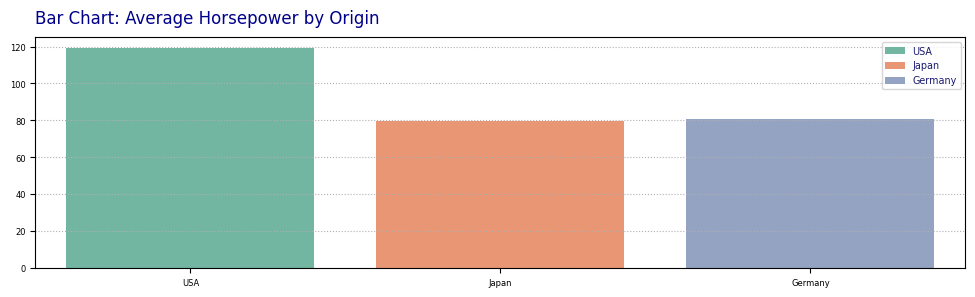

In [45]:
_ = sns.barplot(data = df, x = "origin", y = "horsepower", errorbar=None, hue = "origin", palette="Set2")
plt.title("Bar Chart: Average Horsepower by Origin", loc = "left", pad = 10, color = "darkblue", size = "large")
plt.xlabel("")
plt.ylabel("")
plt.legend(df.origin.unique(), labelcolor = "midnightblue", fontsize = "x-small")
plt.grid(axis="y", ls = ":")

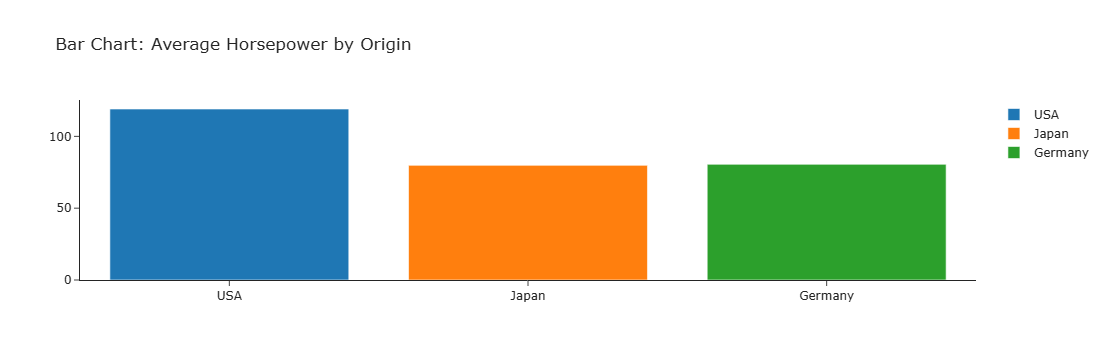

In [77]:
fig = px.histogram(data_frame=df, x="origin", y = "horsepower", histfunc="avg", template="simple_white", color = "origin",
            title = "Bar Chart: Average Horsepower by Origin", labels = {"origin" : "", "horsepower" : ""})
fig.update_layout(yaxis_title = "")
fig.show()

In [58]:
import plotly
plotly.io.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

###### Ex. Scatter Plot: MPG vs. Weight by Origin

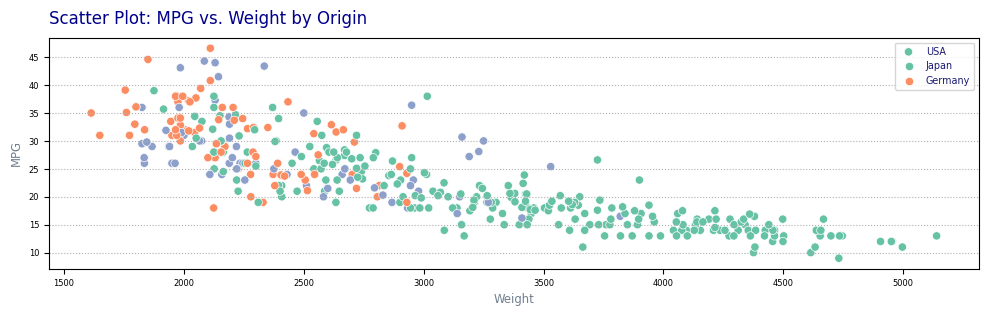

In [50]:
_ = sns.scatterplot(data = df, x = "weight", y = "mpg", hue = "origin", palette="Set2")
plt.title("Scatter Plot: MPG vs. Weight by Origin", loc = "left", pad = 10, color = "darkblue", size = "large")
plt.xlabel("Weight", color = "slategray", size = "small")
plt.ylabel("MPG", color = "slategray", size = "small")
plt.legend(df.origin.unique(), labelcolor = "midnightblue", fontsize = "x-small")
plt.grid(axis="y", ls = ":")

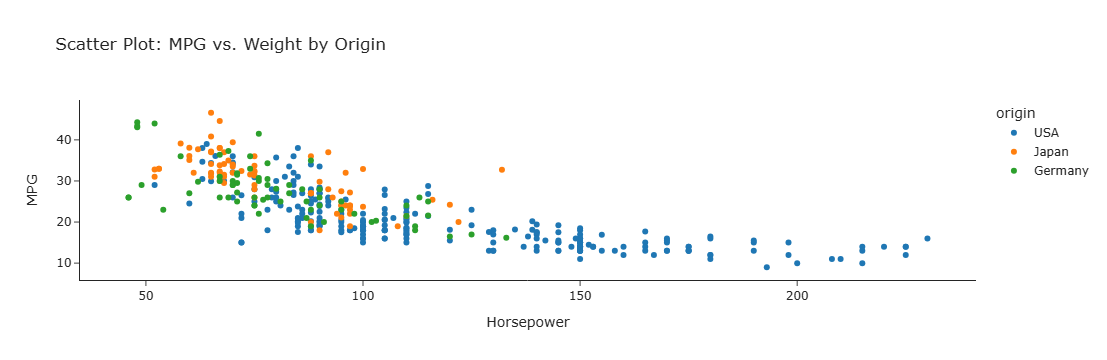

In [69]:
px.scatter(data_frame=df, x="horsepower", y = "mpg", template="simple_white", color = "origin", 
           title = "Scatter Plot: MPG vs. Weight by Origin", labels = {"mpg" : "MPG", "horsepower" : "Horsepower"})

###### Ex. Box Plot: MPG Distribution by Origin

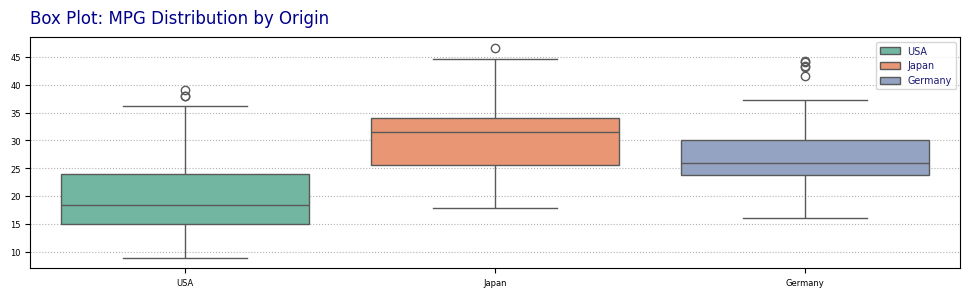

In [55]:
_ = sns.boxplot(data = df, y = "mpg", x = "origin", hue = "origin", palette="Set2")
plt.title("Box Plot: MPG Distribution by Origin", loc = "left", pad = 10, color = "darkblue", size = "large")
plt.xlabel("", color = "slategray", size = "small")
plt.ylabel("", color = "slategray", size = "small")
plt.legend(df.origin.unique(), labelcolor = "midnightblue", fontsize = "x-small")
plt.grid(axis="y", ls = ":")

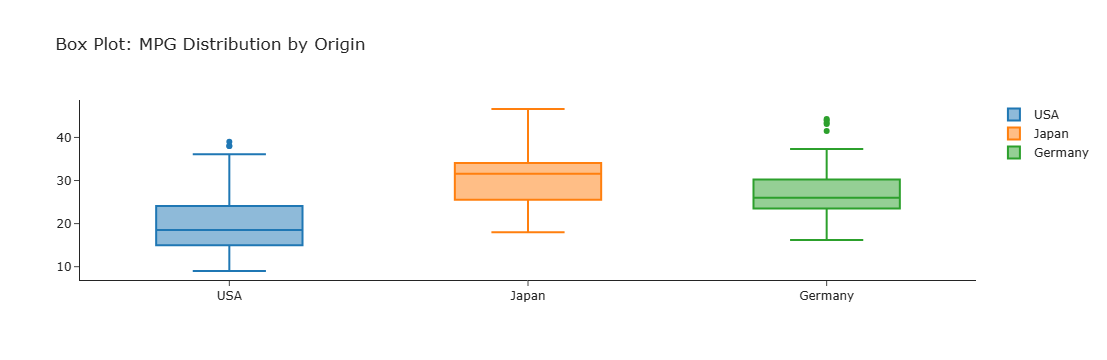

In [78]:
px.box(data_frame=df, x="origin", y = "mpg", template="simple_white", color = "origin", 
           title = "Box Plot: MPG Distribution by Origin", labels = {"mpg" : "", "origin" : ""})